In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib as mlt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
network = pd.read_excel('C:/Users/RAHUL/PYTHON Assignment/Data Science/3. Network Intrusion Detection System/train.xlsx')

In [3]:
network.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [4]:
network.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,19


## Perform Pandas Profiling on the data provided

In [5]:
pandas_profiling.ProfileReport(network)

Number of variables,43
Number of observations,125973
Total Missing (%),0.0%
Total size in memory,41.3 MiB
Average record size in memory,344.0 B
Numeric,26
Categorical,4
Boolean,5
Date,0
Text (Unique),0
Rejected,8


### Dropping Highly Correlated Variables

In [6]:
network.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [7]:
network.drop(columns=['dst_host_rerror_rate','srv_serror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate','num_outbound_cmds','num_root','srv_rerror_rate'],inplace=True)

In [8]:
network.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'attack', 'last_flag'],
      dtype='object')

In [9]:
pandas_profiling.ProfileReport(network)

Number of variables,35
Number of observations,125973
Total Missing (%),0.0%
Total size in memory,33.6 MiB
Average record size in memory,280.0 B
Numeric,26
Categorical,4
Boolean,5
Date,0
Text (Unique),0
Rejected,0


In [10]:
network.urgent.value_counts()

0    125964
1         5
2         3
3         1
Name: urgent, dtype: int64

In [11]:
network.su_attempted.value_counts()

0    125893
2        59
1        21
Name: su_attempted, dtype: int64

### Creating Target Variable

In [12]:
network.attack.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [13]:
def target(x):
    if x in ['back','land','neptune','pod','smurf','teardrop','apache2','udpstorm','processtable','worm']:
        return 'DoS'
    elif x in ['satan','ipsweep','nmap','portsweep','mscan','saint']:
        return 'Probe'
    elif x in ['guess_passwd','ftp_write','imap','phf','multihop','warezmaster','warezclient','spy','xlock','xsnoop','snmpguess','snmpgetattack','httptunnel','sendmail','named']:
        return 'R2L'
    elif x in ['buffer_overflow','loadmodule','rootkit','perl','sqlattack','xterm','ps']:
        return 'U2R'
    elif x == 'normal':
        return 'Normal'

In [14]:
network['Attack_Class'] = network['attack'].apply(lambda x: target(x))

In [15]:
network.drop(columns=['attack'],inplace=True)

In [16]:
network.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag,Attack_Class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,0.0,150,25,0.17,0.03,0.17,0.0,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.15,0.0,255,1,0.00,0.60,0.88,0.0,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.0,255,26,0.10,0.05,0.00,0.0,19,DoS


### Substituting Target Variables with Numbers

In [17]:
def target_subs(x):
    if x == 'DoS':
        return 0
    elif x == 'Probe':
        return 1
    elif x == 'R2L':
        return 2
    elif x == 'U2R':
        return 3
    elif x == 'Normal':
        return 4

In [18]:
network['Attack_Class'] = network['Attack_Class'].apply(lambda x : target_subs(x))

In [19]:
network.Attack_Class.value_counts()

4    67343
0    45927
1    11656
2      995
3       52
Name: Attack_Class, dtype: int64

### Dummy Variable

In [20]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=False)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [21]:
vars = ['protocol_type','service','flag','last_flag','is_host_login','is_guest_login','logged_in','urgent','land','root_shell','su_attempted']

for c_feature in vars:
    network[c_feature] = network[c_feature].astype('category')
    network = create_dummies(network , c_feature )
    
network.head(3)

,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,num_compromised,num_file_creations,num_shells,num_access_files,...,urgent_1,urgent_2,urgent_3,land_0,land_1,root_shell_0,root_shell_1,su_attempted_0,su_attempted_1,su_attempted_2
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [22]:
network.dtypes

duration                         int64
src_bytes                        int64
dst_bytes                        int64
wrong_fragment                   int64
hot                              int64
num_failed_logins                int64
num_compromised                  int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count               int64
dst_host_same_srv_rate         float64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
Attack_Class                     int64
protocol_type_icmp               uint8
protocol_type_tcp        

In [23]:
network.Attack_Class.value_counts()

4    67343
0    45927
1    11656
2      995
3       52
Name: Attack_Class, dtype: int64

## Missing Value Treatment

In [24]:
network.isna().any().sum()

0

### Outlier Treatment

In [25]:
network.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.56,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03
num_file_creations,125973.0,0.012669,4.839351e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.300000e+01
num_shells,125973.0,0.000413,2.218113e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.000000e+00
num_access_files,125973.0,0.004096,9.936956e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.000000e+00


In [26]:
def outlier_clapping(x):
    x = x.clip(lower = x.dropna().quantile(0.05), upper = x.dropna().quantile(0.95))
    return x

In [27]:
network = network.apply(lambda x : outlier_clapping(x))

### Correlation

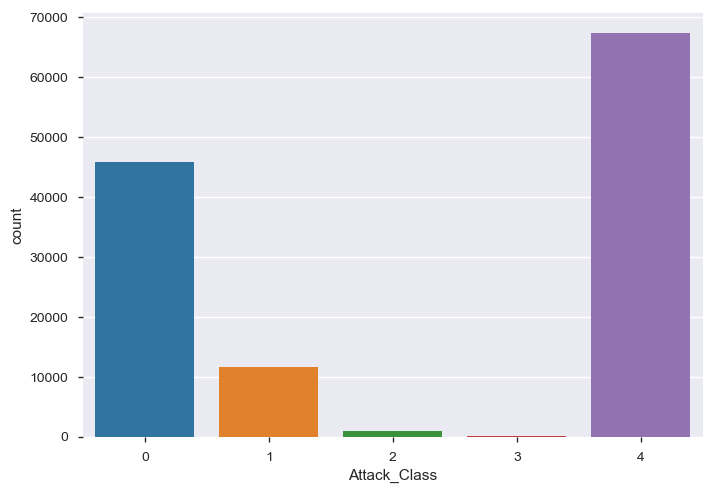

In [28]:
sns.countplot(x='Attack_Class',data=network)

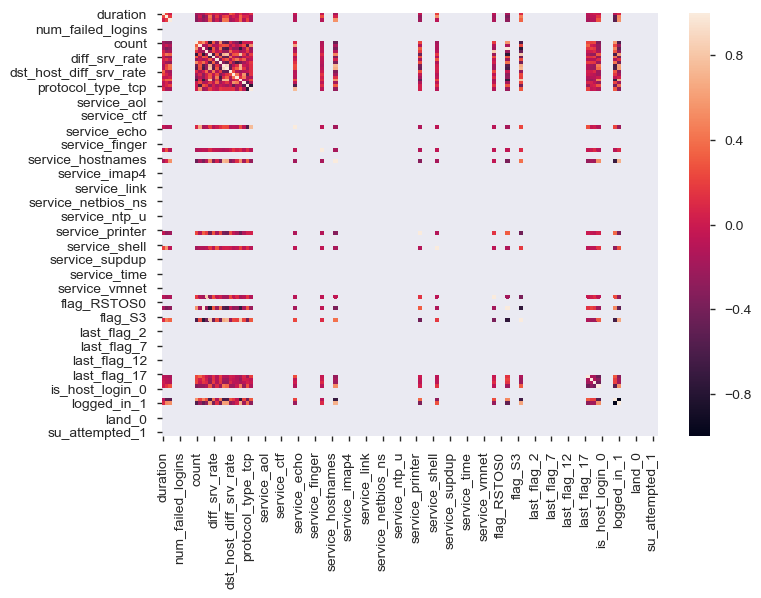

In [29]:
sns.heatmap(network.corr())

In [30]:
y = network.Attack_Class
corr_check = {}
for vars in network.columns:
    if y.corr(network[vars]) > 0.1:
        corr_check[vars] = y.corr(network[vars])
corr_check.keys()

dict_keys(['duration', 'src_bytes', 'dst_bytes', 'same_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate', 'Attack_Class', 'protocol_type_udp', 'service_domain_u', 'service_ftp_data', 'service_http', 'service_smtp', 'flag_SF', 'last_flag_21', 'logged_in_1'])

## Feature Selection

#### RFE

In [31]:
network.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'hot',
       'num_failed_logins', 'num_compromised', 'num_file_creations',
       'num_shells', 'num_access_files',
       ...
       'urgent_1', 'urgent_2', 'urgent_3', 'land_0', 'land_1', 'root_shell_0',
       'root_shell_1', 'su_attempted_0', 'su_attempted_1', 'su_attempted_2'],
      dtype='object', length=147)

In [32]:
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier()
rfe = RFE(dt,n_features_to_select=25)

In [34]:
X = network[network.columns.difference(['Attack_Class'])]
Y = network['Attack_Class']

In [35]:
rfe.fit(X,Y)

RFE(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',
                                     max_depth=None, max_features=None,
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     presort=False, random_state=None,
                                     splitter='best'),
    n_features_to_select=25, step=1, verbose=0)

In [36]:
print(rfe.support_)
print(rfe.ranking_)
RFE_Features = X.columns[rfe.get_support()]

[ True  True  True  True  True  True  True  True  True  True False False
 False False False  True False False False  True False False False False
 False False False False False False False False False False False False
 False False False  True False  True  True False False False False False
 False False False  True False False False False False  True  True False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False  True False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False  True  True False False False False False False False
 False False]
[  1   1   1   1   1   1   1   1   1   1  24  10  28  29  26   1  31  35
  34   1  45  48  52  54  50  58  60 

In [37]:
RFE_Features

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'duration', 'flag_S0', 'flag_SF',
       'last_flag_19', 'last_flag_20', 'last_flag_21', 'logged_in_1',
       'protocol_type_icmp', 'protocol_type_tcp', 'rerror_rate', 'serror_rate',
       'service_ftp_data', 'service_http', 'service_private', 'src_bytes',
       'srv_count'],
      dtype='object')

 - KBest

In [38]:
kbest = SelectKBest(f_regression,k=25)
kbest.fit(X,Y)

C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\RAHUL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\RAHUL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\RAHUL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWar

SelectKBest(k=25, score_func=<function f_regression at 0x0000027983D3A6A8>)

In [39]:
cols = X.columns[kbest.get_support()]
cols

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'flag_REJ', 'flag_S0', 'flag_SF', 'last_flag_18',
       'last_flag_19', 'last_flag_20', 'last_flag_21', 'logged_in_0',
       'logged_in_1', 'protocol_type_udp', 'rerror_rate', 'same_srv_rate',
       'serror_rate', 'service_domain_u', 'service_http', 'service_private',
       'service_smtp', 'src_bytes'],
      dtype='object')

In [40]:
print('RFE: ',RFE_Features)
print('KBest: ',cols)

RFE:  Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'duration', 'flag_S0', 'flag_SF',
       'last_flag_19', 'last_flag_20', 'last_flag_21', 'logged_in_1',
       'protocol_type_icmp', 'protocol_type_tcp', 'rerror_rate', 'serror_rate',
       'service_ftp_data', 'service_http', 'service_private', 'src_bytes',
       'srv_count'],
      dtype='object')
KBest:  Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'flag_REJ', 'flag_S0', 'flag_SF', 'last_flag_18',
       'last_flag_19', 'last_flag_20', 'last_flag_21', 'logged_in_0',
       'logged_in_1', 'protocol_type_udp', 'rerror_rate', 'same_srv_rate',
       'serror_rate', 'service_domain_u', 'service_http', 'service_private',
       'service_smtp', 'src_bytes'],
  

### Perform F_Regression to check for the Pvalue of each variable with the dependent variable 


In [41]:
%pwd

'C:\\Users\\RAHUL\\PYTHON Assignment\\Data Science\\3. Network Intrusion Detection System'

In [42]:
features = '+'.join(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'duration', 'flag_S0', 'flag_SF','flag_REJ','last_flag_18',
       'last_flag_19', 'last_flag_20', 'last_flag_21', 'logged_in_1','logged_in_0',
       'protocol_type_icmp', 'rerror_rate', 'same_srv_rate', 'serror_rate','protocol_type_udp',
       'service_ftp_data', 'service_http', 'service_private', 'src_bytes','service_domain_u','service_smtp',
       'srv_count'])

In [43]:
features

'count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+duration+flag_S0+flag_SF+flag_REJ+last_flag_18+last_flag_19+last_flag_20+last_flag_21+logged_in_1+logged_in_0+protocol_type_icmp+rerror_rate+same_srv_rate+serror_rate+protocol_type_udp+service_ftp_data+service_http+service_private+src_bytes+service_domain_u+service_smtp+srv_count'

In [44]:
features = 'count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+duration+flag_S0+flag_SF+flag_REJ+last_flag_18+last_flag_19+last_flag_20+last_flag_21+logged_in_1+logged_in_0+protocol_type_icmp+rerror_rate+same_srv_rate+serror_rate+protocol_type_udp+service_ftp_data+service_http+service_private+src_bytes+service_domain_u+service_smtp+srv_count'
features1 = features.split('+')

In [45]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
X = network[features1]
target = network['Attack_Class']
F_values, p_values  = f_regression(X, target )

In [46]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(X.columns, F_values,  ['%.3f' % p for p in p_values])]

f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results.to_csv('F_Reg.csv')

In [47]:
f_reg_results.sort_values(by=['P_Value'])

f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

f_reg_results_new=f_reg_results[f_reg_results.P_Value<=0.1]

f_reg_results_new.to_csv('F_Reg_New.csv')

### Check MultiCollinearity between the Feature Columns

In [48]:
features2 = '+'.join(features1)

In [49]:
features2

'count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+duration+flag_S0+flag_SF+flag_REJ+last_flag_18+last_flag_19+last_flag_20+last_flag_21+logged_in_1+logged_in_0+protocol_type_icmp+rerror_rate+same_srv_rate+serror_rate+protocol_type_udp+service_ftp_data+service_http+service_private+src_bytes+service_domain_u+service_smtp+srv_count'

In [50]:
features2='count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_srv_diff_host_rate+duration+flag_REJ+last_flag_18+last_flag_19+last_flag_20+protocol_type_icmp+service_ftp_data+service_private+service_domain_u+service_smtp+logged_in_0'

In [51]:
#MUltiple Iteration of Feature Columns based on the previous conversion and removing and checking the Multi Colinnearity Values
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices



a,b = dmatrices('Attack_Class~' + features2 ,data=network,return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif['features'] = b.columns

In [52]:
vif.sort_values('features',ascending=False)
vif.to_csv('VIF.csv')
vif

,VIF Factor,features
0,14.461064,Intercept
1,2.074692,count
2,1.566139,diff_srv_rate
3,1.650107,dst_bytes
4,2.409098,dst_host_count
5,1.838738,dst_host_diff_srv_rate
6,2.364414,dst_host_same_src_port_rate
7,2.420023,dst_host_srv_diff_host_rate
8,1.333554,duration
9,1.278423,flag_REJ


### Standardizing the data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
final_cols = features2.split('+')
network_final = pd.concat([network[final_cols],network['Attack_Class']],axis=1)

In [56]:
network_final.Attack_Class.value_counts()

4    67343
0    45927
1    11656
2      995
3       52
Name: Attack_Class, dtype: int64

In [57]:
X = network_final[final_cols]
Y = network_final['Attack_Class']
X_scale = StandardScaler().fit_transform(X)

### Train Test Split

In [58]:
train_x, test_x, train_y, test_y = train_test_split(X_scale,Y,random_state=6789)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=6789)

### Applying Over Sampling to remove skewness

In [60]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [61]:
ros = RandomOverSampler(random_state=6789)
train_ros_x, train_ros_y = ros.fit_sample(train_x,train_y)
test_ros_x, test_ros_y = ros.fit_sample(test_x,test_y)
x_ros_train, y_ros_train = ros.fit_sample(x_train,y_train)
x_ros_test, y_ros_test = ros.fit_sample(x_test,y_test)

In [62]:
rus = RandomUnderSampler(random_state=6789)
train_rus_x, train_rus_y = rus.fit_sample(train_x,train_y)
test_rus_x, test_rus_y = rus.fit_sample(test_x,test_y)

In [63]:
print('Over Sampling Data: \n',pd.Series(train_ros_y).value_counts())
print('\n')
print('Under Sampling Data: \n',pd.Series(train_rus_y).value_counts())

Over Sampling Data: 
 4    50419
3    50419
2    50419
1    50419
0    50419
dtype: int64


Under Sampling Data: 
 4    41
3    41
2    41
1    41
0    41
dtype: int64


In [64]:
print('Over Sampling Data: \n',pd.Series(test_ros_y).value_counts())
print('\n')
print('Under Sampling Data: \n',pd.Series(test_rus_y).value_counts())

Over Sampling Data: 
 4    16924
3    16924
2    16924
1    16924
0    16924
dtype: int64


Under Sampling Data: 
 4    11
3    11
2    11
1    11
0    11
dtype: int64


### Feature Selection using PCA

In [65]:
from sklearn.decomposition import PCA

In [66]:
len(final_cols)

18

In [67]:
pca = PCA(n_components=18)

In [68]:
pca.fit(train_ros_x)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [69]:
pca_train = pca.fit_transform(train_ros_x)
pca_train

array([[-3.92354032, -2.40052687,  0.5552563 , ..., -0.11855164,
         0.9986535 , -0.76585313],
       [-2.9375238 , -1.10885169, -0.38886801, ...,  0.38712886,
         0.80486358, -0.63337314],
       [-2.64586189, -0.91644594, -0.60077836, ..., -0.25364809,
         0.01947956,  0.00991086],
       ...,
       [-0.71592385,  3.82226468,  0.07276061, ..., -0.04457363,
        -0.00513726, -0.1497318 ],
       [-0.68890795,  3.86303966,  0.0455079 , ..., -0.02693458,
         0.01395468, -0.11919235],
       [-0.68890795,  3.86303966,  0.0455079 , ..., -0.02693458,
         0.01395468, -0.11919235]])

In [70]:
Matrix = pd.DataFrame(pca.components_,columns=final_cols)
Matrix1 = np.transpose(Matrix)
Matrix1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,-0.209812,-0.141080,-0.033407,0.038348,0.047769,-0.321764,-0.246697,-0.067300,-0.102333,-0.089648,-0.283720,-0.071485,0.036943,0.646471,-0.072496,0.055660,-0.477856,-0.046694
diff_srv_rate,-0.209037,-0.174850,-0.024335,0.389905,0.470290,-0.059016,-0.406098,0.227786,0.282306,-0.024757,0.407955,0.221095,0.049945,-0.154071,-0.043422,0.014174,-0.087495,0.007887
dst_bytes,0.084012,0.274064,-0.116502,-0.075202,0.282191,0.493275,-0.422733,-0.038781,-0.042151,-0.009836,-0.081784,-0.430564,0.128021,0.167646,0.173585,0.223389,0.140947,0.238960
dst_host_count,-0.374905,-0.036557,-0.122103,-0.016630,-0.226493,-0.237177,-0.010342,-0.014976,0.066892,0.062465,0.282714,-0.588129,-0.138072,-0.171743,0.441967,-0.206207,-0.115953,0.031306
dst_host_diff_srv_rate,-0.219764,-0.084421,0.168374,0.578044,-0.119210,0.301478,0.302253,-0.026279,-0.132217,0.495169,0.034643,-0.177680,0.146542,0.146696,-0.163300,0.139499,-0.018333,-0.006656
dst_host_same_src_port_rate,0.437350,-0.112895,0.274611,0.313175,-0.296891,0.158836,-0.393489,-0.201245,-0.129506,-0.005407,-0.017723,0.118957,0.029566,-0.062970,0.335573,-0.341206,-0.201148,-0.090482
dst_host_srv_diff_host_rate,0.413071,-0.308788,0.317079,-0.020373,0.329232,-0.159482,0.358975,0.199795,0.188964,-0.117345,0.049349,-0.321093,0.318594,0.174210,0.166592,-0.089138,0.029582,0.083788
duration,0.093974,0.748967,0.289610,0.360086,-0.001123,-0.412170,0.013960,0.080877,0.050586,-0.118169,-0.028414,-0.063893,-0.064529,0.017533,0.006167,0.094206,0.069641,0.020315
flag_REJ,-0.144865,-0.135149,0.021173,0.238547,0.402812,0.047642,0.133454,0.020668,-0.110340,-0.084653,-0.632293,-0.037443,-0.384151,-0.289347,0.243972,-0.070049,0.017978,-0.063622
last_flag_18,-0.082889,-0.093407,0.056548,-0.009302,-0.271003,0.012519,-0.238729,0.744759,-0.071787,0.048940,-0.168058,-0.026809,-0.038369,0.192455,0.007405,-0.160289,0.406563,-0.172628


In [71]:
pca.explained_variance_

array([6.66199748, 4.18138801, 2.53629452, 2.46343517, 1.17560013,
       0.98529504, 0.86739364, 0.71530697, 0.66356493, 0.6204636 ,
       0.57572219, 0.47720021, 0.42169769, 0.35885817, 0.32726755,
       0.29192755, 0.25779336, 0.19301538])

In [72]:
var = pca.explained_variance_ratio_
var

array([0.28021937, 0.17587907, 0.10668255, 0.10361791, 0.04944852,
       0.04144384, 0.03648463, 0.0300875 , 0.02791111, 0.02609817,
       0.02421624, 0.02007217, 0.0177376 , 0.01509442, 0.01376565,
       0.01227916, 0.0108434 , 0.00811868])

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

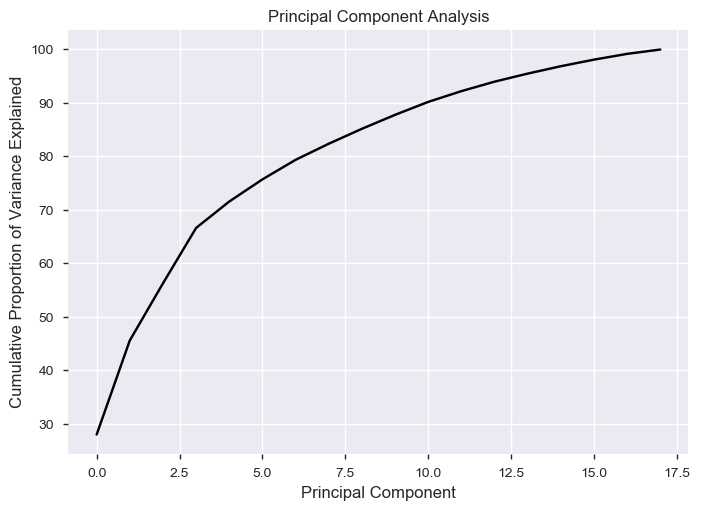

In [73]:
cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)

In [74]:
cumulative_var

array([28.02, 45.61, 56.28, 66.64, 71.58, 75.72, 79.37, 82.38, 85.17,
       87.78, 90.2 , 92.21, 93.98, 95.49, 96.87, 98.1 , 99.18, 99.99])

### Implementing Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [76]:
#pca = PCA(n_components=5,whiten=True,random_state=6789)
dt = DecisionTreeClassifier()
#model_dt = make_pipeline(pca,dt)

In [77]:
param_grid = {'max_depth':np.arange(16,25)}

In [78]:
grid_dt = GridSearchCV(dt,
                       cv=5,
                       param_grid=param_grid,
                       n_jobs=-1,
                       verbose=True)

In [79]:
%time grid_dt.fit(x_ros_train,y_ros_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   26.3s finished


Wall time: 27.3 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([16, 17, 18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, retu

In [80]:
grid_dt.best_params_

{'max_depth': 22}

In [81]:
#pca = PCA(n_components=4,whiten=True,random_state=6789)
dt = DecisionTreeClassifier(max_depth=22)
#model_dt = make_pipeline(pca,dt)

In [82]:
dt.fit(x_ros_train,y_ros_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
dt.score(x_ros_train,y_ros_train)

0.9978658838929768

In [84]:
dt.score(x_ros_test,y_ros_test)

0.8584377215788229

In [85]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt, x_ros_train,y_ros_train, cv=10)

array([0.99678699, 0.99627132, 0.99627132, 0.99646965, 0.99619199,
       0.99623165, 0.99698532, 0.99698532, 0.99730266, 0.9968657 ])

In [86]:
yfit_test = dt.predict(x_ros_test)
yfit_train = dt.predict(x_ros_train)

In [87]:
from sklearn import metrics
print(metrics.classification_report(yfit_train,y_ros_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     50205
           1       1.00      1.00      1.00     50485
           2       1.00      1.00      1.00     50311
           3       1.00      1.00      1.00     50597
           4       1.00      1.00      1.00     50497

    accuracy                           1.00    252095
   macro avg       1.00      1.00      1.00    252095
weighted avg       1.00      1.00      1.00    252095



In [88]:
print(metrics.classification_report(yfit_test,y_ros_test))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     19976
           1       0.99      1.00      0.99     16785
           2       0.96      1.00      0.98     16270
           3       0.36      1.00      0.53      6126
           4       0.99      0.66      0.79     25463

    accuracy                           0.86     84620
   macro avg       0.86      0.90      0.84     84620
weighted avg       0.94      0.86      0.88     84620



- The Model is Overfit and will not be good to use for other data sets.<br>

### Implementing PCA + SVM through Pipeline

In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [90]:
pca = PCA(n_components=5,whiten=True,random_state=6789)
svc = SVC(kernel='rbf',class_weight='balanced',probability=True)
model_svc = make_pipeline(pca,svc)

In [92]:
model_svc.fit(train_ros_x,train_ros_y)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=6789, svd_solver='auto', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [93]:
model_svc.score(train_ros_x,train_ros_y)

0.9261706896209763

In [94]:
model_svc.score(test_ros_x,test_ros_y)

0.8980264712833845

In [95]:
#param_grid = {'svc__C': [10,15,20],'svc__gamma': [0.0001, 0.0005,0.001]}

In [96]:
#grid_svc = GridSearchCV(model_svc,param_grid,cv=5,n_jobs=-1,verbose=True)

In [97]:
#grid_svc.fit(train_ros_x,train_ros_y)

In [98]:
#grid_svc.best_params_

In [99]:
#grid.best_score_

In [136]:
##Calculate ROC AUC Score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(test_ros_y, yfit_test, average="macro"):
    lb = LabelBinarizer()
    lb.fit(test_ros_y)
    y_test = lb.transform(test_ros_y)
    y_pred = lb.transform(yfit_test)
    return roc_auc_score(y_test, y_pred, average=average)

print(multiclass_roc_auc_score(test_ros_y, yfit_test))

0.9362665445521152


In [102]:
yfit_train = model_svc.predict(train_ros_x)
yfit_test = model_svc.predict(test_ros_x)

In [103]:
from sklearn.metrics import classification_report
print(classification_report(yfit_train,train_ros_y))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     49908
           1       0.98      0.95      0.96     52120
           2       0.83      0.95      0.89     44192
           3       1.00      0.91      0.95     55653
           4       0.86      0.87      0.86     50222

    accuracy                           0.93    252095
   macro avg       0.93      0.93      0.93    252095
weighted avg       0.93      0.93      0.93    252095



In [104]:
print(classification_report(yfit_test,test_ros_y))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     16743
           1       0.98      0.94      0.96     17594
           2       0.88      0.95      0.92     15795
           3       0.82      0.90      0.86     15422
           4       0.85      0.76      0.80     19066

    accuracy                           0.90     84620
   macro avg       0.90      0.90      0.90     84620
weighted avg       0.90      0.90      0.90     84620



In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
confusion_matrix(train_ros_y, yfit_train)

array([[48190,   727,    84,    13,  1405],
       [  623, 49374,     0,    77,   345],
       [    0,     0, 41987,  3473,  4959],
       [    0,     0,     0, 50419,     0],
       [ 1095,  2019,  2121,  1671, 43513]], dtype=int64)

In [107]:
confusion_matrix(test_ros_y, yfit_test)

array([[16170,   268,    33,     2,   451],
       [  160, 16577,     0,    42,   145],
       [    0,    68, 14977,   914,   965],
       [    0,     0,     0, 13843,  3081],
       [  413,   681,   785,   621, 14424]], dtype=int64)

In [108]:
test_ros_y

array([4, 4, 0, ..., 3, 3, 3], dtype=int64)

In [109]:
#model_svc.predict_proba(test_ros_x)
y_test_i = list(map(lambda x: 1 if x == 1 else 5, test_ros_y))
print(y_test_i)

[5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 1, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 

In [110]:
from sklearn import metrics
y_predict = model_svc.predict(test_ros_x)

# Compute ROC curve and ROC AUC for each class
n_classes = 5
fpr = dict()
tpr = dict()
roc_auc_svc = dict()
all_y_test_i = np.array([])
all_y_predict_i = np.array([])
for i in range(n_classes):
    y_test_i = list(map(lambda x: 1 if x == i else 5, test_ros_y))
    y_predict_i = list(map(lambda x: 1 if x == i else 5, y_predict))
    roc_auc_svc[i] = metrics.roc_auc_score(y_test_i,y_predict_i)

In [111]:
roc_auc_svc

{0: 0.9734917868116285,
 1: 0.9822367643583076,
 2: 0.9364364216497282,
 3: 0.8973129874734105,
 4: 0.8918547624675018}

In [112]:
ROC_Score_SVC = pd.DataFrame(roc_auc_svc,index=['ROC AUC Score'])
ROC_Score_SVC

,0,1,2,3,4
ROC AUC Score,0.973492,0.982237,0.936436,0.897313,0.891855


### PCA + ANN through PipeLine

In [137]:
from sklearn.neural_network import MLPClassifier

In [138]:
pca = PCA(n_components=5,whiten=True,random_state=6789)
ann = MLPClassifier()
model_ann = make_pipeline(pca,ann)

In [139]:
model_ann.fit(train_ros_x,train_ros_y)

C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=6789, svd_solver='auto', tol=0.0,
                     whiten=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
                               momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
  

In [140]:
model_ann.score(train_ros_x,train_ros_y)

0.9733195819036474

In [141]:
model_ann.score(test_ros_x,test_ros_y)

0.9338690616875444

In [142]:
#param_grid = {'mlpclassifier__alpha':[0.0005,0.0001,0.001,0.005],
#              'mlpclassifier__learning_rate':['constant','adaptive'],
#              'mlpclassifier__solver':['sgd', 'adam']
#             }

In [143]:
#grid_ann = GridSearchCV(model_ann,
#                    param_grid=param_grid,
#                    cv=5,
#                    n_jobs=-1,
#                    verbose=True)

In [144]:
#grid_ann.fit(train_ros_x,train_ros_y)

In [145]:
#grid_ann.best_params_

In [146]:
#grid_ann.score(train_ros_x,train_ros_y)

In [147]:
yfit_ann_test = model_ann.predict(test_ros_x)
yfit_ann_train = model_ann.predict(train_ros_x)

In [156]:
##Calculate ROC AUC Score for ANN Model
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(test_ros_y, yfit_ann_test, average="macro"):
    lb = LabelBinarizer()
    lb.fit(test_ros_y)
    y_test = lb.transform(test_ros_y)
    y_pred = lb.transform(yfit_ann_test)
    return roc_auc_score(y_test, y_pred, average=average)

print(multiclass_roc_auc_score(test_ros_y, yfit_ann_test))

0.9586681635547153


In [157]:
metrics.confusion_matrix(yfit_ann_test,test_ros_y)

array([[16387,   116,     0,     0,   250],
       [  244, 16558,     0,     0,   387],
       [   23,    12, 16324,     0,   285],
       [    1,     7,   238, 13843,    90],
       [  269,   231,   362,  3081, 15912]], dtype=int64)

In [158]:
metrics.confusion_matrix(yfit_ann_train,train_ros_y)

array([[48920,   326,     0,     0,   604],
       [  639, 49569,     0,     0,  1047],
       [   55,     3, 49890,  1230,   731],
       [   13,     0,   395, 49189,   236],
       [  792,   521,   134,     0, 47801]], dtype=int64)

In [159]:
print(classification_report(yfit_ann_test,test_ros_y))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     16753
           1       0.98      0.96      0.97     17189
           2       0.96      0.98      0.97     16644
           3       0.82      0.98      0.89     14179
           4       0.94      0.80      0.87     19855

    accuracy                           0.93     84620
   macro avg       0.93      0.94      0.93     84620
weighted avg       0.94      0.93      0.93     84620



In [160]:
print(classification_report(yfit_ann_train,train_ros_y))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     49850
           1       0.98      0.97      0.98     51255
           2       0.99      0.96      0.98     51909
           3       0.98      0.99      0.98     49833
           4       0.95      0.97      0.96     49248

    accuracy                           0.97    252095
   macro avg       0.97      0.97      0.97    252095
weighted avg       0.97      0.97      0.97    252095



In [161]:
from sklearn import metrics
y_predict = model_ann.predict(test_ros_x)

# Compute ROC curve and ROC AUC for each class
n_classes = 5
fpr = dict()
tpr = dict()
roc_auc_ann = dict()
all_y_test_i = np.array([])
all_y_predict_i = np.array([])
for i in range(n_classes):
    y_test_i = list(map(lambda x: 1 if x == i else 5, test_ros_y))
    y_predict_i = list(map(lambda x: 1 if x == i else 5, y_predict))
    roc_auc_ann[i] = metrics.roc_auc_score(y_test_i,y_predict_i)

In [162]:
ROC_Score_ANN = pd.DataFrame(roc_auc_ann,index=['ROC AUC Score'])

In [163]:
ROC_Score_SVC

,0,1,2,3,4
ROC AUC Score,0.973492,0.982237,0.936436,0.897313,0.891855


In [164]:
ROC_Score_ANN

,0,1,2,3,4
ROC AUC Score,0.981432,0.984526,0.97991,0.906494,0.940979


### Conclusion

- Both the SVC and ANN Model results looks good enough to be used for prediction. But based on the ROC AUC Score, SVC has been selected for better prediction


## Predicting Multinomial value for Attack Class in Test Data Set

In [165]:
network_test = pd.read_excel('C:/Users/RAHUL/PYTHON Assignment/Data Science/3. Network Intrusion Detection System/test.xlsx')
network_out = pd.read_excel('C:/Users/RAHUL/PYTHON Assignment/Data Science/3. Network Intrusion Detection System/test.xlsx')

In [166]:
network_test.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [167]:
network_test.drop(columns=['dst_host_rerror_rate','srv_serror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate','num_outbound_cmds','num_root','srv_rerror_rate'],inplace=True)

In [168]:
vars = ['protocol_type','service','flag','last_flag','is_host_login','is_guest_login','logged_in','urgent','land','root_shell','su_attempted']

for c_feature in vars:
    network_test[c_feature] = network_test[c_feature].astype('category')
    network_test = create_dummies(network_test , c_feature )
    
network_test.head(3)

,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,num_compromised,num_file_creations,num_shells,num_access_files,...,urgent_1,urgent_2,urgent_3,land_0,land_1,root_shell_0,root_shell_1,su_attempted_0,su_attempted_1,su_attempted_2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [169]:
network_test.isna().any().sum()

0

In [170]:
network_test.drop(columns=['attack'],inplace=True)

In [171]:
network_test = network_test.apply(lambda x : outlier_clapping(x))

In [172]:
network_test_final = network_test[final_cols]

In [173]:
len(final_cols)

18

In [174]:
X = network_test_final[final_cols]
X_scale = StandardScaler().fit_transform(X)

In [175]:
network_out['Attack_Class'] = model_svc.predict(X_scale)

In [176]:
def target_subs(x):
    if x == 0:
        return 'DOS'
    elif x == 1:
        return 'Probe'
    elif x == 2:
        return 'R2L'
    elif x == 3:
        return 'U2R'
    elif x == 4:
        return 'Normal'

In [177]:
network_out['Attack_Class'] = network_out['Attack_Class'].map({0:'DOS',1:'Probe',2:'R2L',3:'U2R',4:'Normal'})

In [178]:
network_out.to_csv('Network_test_Multinomial_Final.csv')

In [179]:
network_out['Attack_Class'].value_counts()

Normal    12221
DOS        6617
Probe      2259
R2L        1050
U2R         397
Name: Attack_Class, dtype: int64